In [4]:
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import math
import tensorflow as tf
from sklearn.model_selection import train_test_split
import statistics
import numpy as np

In [5]:
#Import the dataset to use
import pandas as pd
landmarks_df = pd.read_csv('demo_landmarks.csv')

In [6]:
landmarks_df

,Unnamed: 0,index,label,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_475_z,landmark_476_x,landmark_476_y,landmark_476_z,landmark_477_x,landmark_477_y,landmark_477_z,landmark_478_x,landmark_478_y,landmark_478_z
0,0,0,happy,0.507577,0.690504,-0.067539,0.496229,0.623151,-0.169093,0.502712,...,-0.007745,0.644046,0.382131,-0.007746,0.616720,0.409790,-0.007778,0.648537,0.432745,-0.007774
1,1,1,happy,0.506913,0.685366,-0.056324,0.531459,0.619465,-0.139276,0.513914,...,0.030370,0.604874,0.417298,0.030375,0.580915,0.438486,0.030342,0.605856,0.459424,0.030347
2,2,2,happy,0.529042,0.675124,-0.048689,0.521464,0.605306,-0.131408,0.522370,...,0.001254,0.629228,0.374716,0.001255,0.608027,0.400481,0.001223,0.634681,0.421634,0.001229
3,3,3,happy,0.599993,0.747104,-0.070677,0.613960,0.620251,-0.156688,0.594227,...,0.073009,0.664438,0.387820,0.073013,0.648348,0.409021,0.072974,0.671501,0.424706,0.072984
4,4,4,happy,0.493806,0.719292,-0.075153,0.504832,0.598530,-0.145169,0.502998,...,0.028723,0.658979,0.422724,0.028730,0.630458,0.440460,0.028699,0.653501,0.464135,0.028702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,13571,13571,neutral,0.504123,0.720507,-0.046975,0.509277,0.640532,-0.119010,0.507253,...,-0.003078,0.620796,0.442554,-0.003075,0.599171,0.462500,-0.003106,0.620639,0.481957,-0.003103
13572,13572,13572,neutral,0.497067,0.734362,-0.066890,0.482076,0.643645,-0.148767,0.489366,...,-0.016498,0.646841,0.384284,-0.016496,0.616515,0.414354,-0.016534,0.647837,0.443698,-0.016528
13573,13573,13573,neutral,0.495357,0.695052,-0.030546,0.516039,0.628310,-0.141734,0.505505,...,-0.001490,0.661572,0.363049,-0.001487,0.627144,0.388726,-0.001521,0.656633,0.417313,-0.001518
13574,13574,13574,neutral,0.515543,0.673966,-0.084770,0.523678,0.591117,-0.129465,0.516794,...,0.054924,0.620038,0.450670,0.054927,0.594984,0.468980,0.054898,0.617746,0.490170,0.054905


In [8]:
#Get the inputs (All landmarks)
x_landmarks_df = landmarks_df.iloc[:,3:]
x_landmarks_df

,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,landmark_3_y,landmark_3_z,landmark_4_x,...,landmark_475_z,landmark_476_x,landmark_476_y,landmark_476_z,landmark_477_x,landmark_477_y,landmark_477_z,landmark_478_x,landmark_478_y,landmark_478_z
0,0.507577,0.690504,-0.067539,0.496229,0.623151,-0.169093,0.502712,0.643993,-0.086510,0.467229,...,-0.007745,0.644046,0.382131,-0.007746,0.616720,0.409790,-0.007778,0.648537,0.432745,-0.007774
1,0.506913,0.685366,-0.056324,0.531459,0.619465,-0.139276,0.513914,0.632298,-0.069509,0.504124,...,0.030370,0.604874,0.417298,0.030375,0.580915,0.438486,0.030342,0.605856,0.459424,0.030347
2,0.529042,0.675124,-0.048689,0.521464,0.605306,-0.131408,0.522370,0.623367,-0.064017,0.490133,...,0.001254,0.629228,0.374716,0.001255,0.608027,0.400481,0.001223,0.634681,0.421634,0.001229
3,0.599993,0.747104,-0.070677,0.613960,0.620251,-0.156688,0.594227,0.654728,-0.082240,0.557118,...,0.073009,0.664438,0.387820,0.073013,0.648348,0.409021,0.072974,0.671501,0.424706,0.072984
4,0.493806,0.719292,-0.075153,0.504832,0.598530,-0.145169,0.502998,0.630493,-0.080717,0.485267,...,0.028723,0.658979,0.422724,0.028730,0.630458,0.440460,0.028699,0.653501,0.464135,0.028702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,0.504123,0.720507,-0.046975,0.509277,0.640532,-0.119010,0.507253,0.659203,-0.054190,0.487693,...,-0.003078,0.620796,0.442554,-0.003075,0.599171,0.462500,-0.003106,0.620639,0.481957,-0.003103
13572,0.497067,0.734362,-0.066890,0.482076,0.643645,-0.148767,0.489366,0.668186,-0.069688,0.457620,...,-0.016498,0.646841,0.384284,-0.016496,0.616515,0.414354,-0.016534,0.647837,0.443698,-0.016528
13573,0.495357,0.695052,-0.030546,0.516039,0.628310,-0.141734,0.505505,0.636442,-0.051140,0.499278,...,-0.001490,0.661572,0.363049,-0.001487,0.627144,0.388726,-0.001521,0.656633,0.417313,-0.001518
13574,0.515543,0.673966,-0.084770,0.523678,0.591117,-0.129465,0.516794,0.622345,-0.076262,0.497495,...,0.054924,0.620038,0.450670,0.054927,0.594984,0.468980,0.054898,0.617746,0.490170,0.054905


In [9]:
#Get the labels
y_landmarks_df = landmarks_df['label']
y_landmarks_df

0          happy
1          happy
2          happy
3          happy
4          happy
          ...   
13571    neutral
13572    neutral
13573    neutral
13574    neutral
13575    neutral
Name: label, Length: 13576, dtype: object

In [11]:
#Split the dataset to training and test sets (80% training, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_landmarks_df, y_landmarks_df, test_size=0.2, random_state=69)

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

#Plotting function to compare values with each other
def createComparisonPlot(title, xlabel, ylabel, data, datalbls):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    colors = ['r-', 'b-', 'g-', 'c-', 'm-', 'y-']
    
    for i in range(len(data)):
        ax.plot(data[i],colors[i],label=datalbls[i])
    plt.legend()
    plt.show()
    plt.savefig(f'{xlabel}vs{ylabel}.png')

#Plotting function to print the data in a single table
def createIterationsPlot(title, xlabel, ylabel, data):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    max_val = data[0]
    idx = 0
    for i in range(len(data)):
        if data[i] > max_val:
            max_val = data[i]
            idx = i
    
    plt.xlim([1, 200])
    plt.scatter(idx, max_val, color="red")
    plt.text(idx + 1, max_val - 0.2, f'x={idx}\ny={max_val}', fontsize = 10)
    ax.plot([i for i in range(1, 801)], data[1:])
    
    plt.savefig(f'{xlabel}vs{ylabel}.png')

In [17]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict

#Test arbritary max iterations for now
mlp_clf = MLPClassifier(max_iter=10000,
                        random_state=42,
                        learning_rate_init=0.02,
                        activation='relu',
                        early_stopping=True)

mlp_clf_history = mlp_clf.fit(X_train, np.ravel(y_train))
    
y_landmarks_pred = cross_val_predict(mlp_clf, X_test, np.ravel(y_test), cv=3)
    
acc = metrics.accuracy_score(y_test, y_landmarks_pred)
pre = metrics.precision_score(y_test, y_landmarks_pred, average = "macro")
rec = metrics.recall_score (y_test, y_landmarks_pred, average = "macro")
f1 = metrics.f1_score (y_test, y_landmarks_pred, average = "macro")

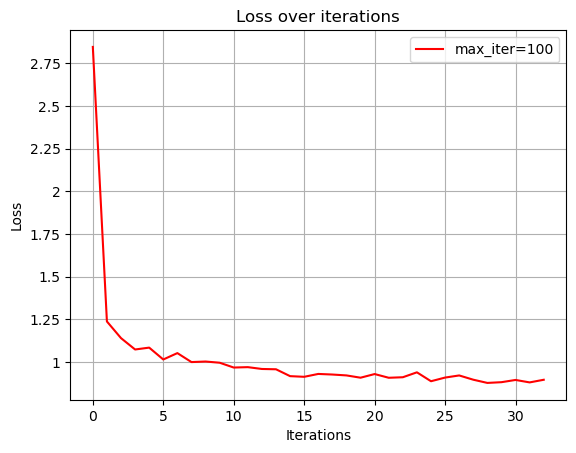

<Figure size 640x480 with 0 Axes>

In [18]:
#Show loss function
createComparisonPlot("Loss over iterations", "Iterations", "Loss", 
               [mlp_clf_history.loss_curve_], 
                ["max_iter=10000"])

3644         sad
9220       anger
3085       happy
2062       happy
11500    neutral
          ...   
11092    neutral
10586    neutral
567        happy
5894         sad
10733    neutral
Name: label, Length: 2716, dtype: object


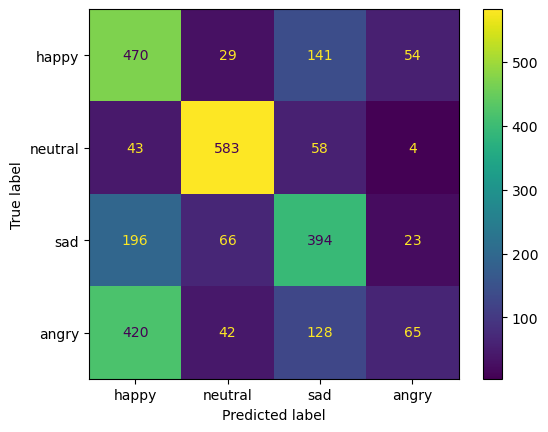

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test,y_landmarks_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["happy", "neutral", "sad", "angry"])

cm_display.plot()
print(y_test)